# Esercitazione 11

In questa esercitazione vogliamo utilizzare una $\textit{Neural Net (NN)}$, ovvero un esempio di algoritmo di machine learning, per diversi compiti, in generale vogliamo fittare dei punti distributi secondo certe funzioni e sporcati da un rumore.

Introduciamo innanzitutto alcuni concetti essenziali per la comprensione dell'analisi dell'esercitazione.

#### Neural net
La rete neurale è un particolare algoritmo di machine learning che, come suggerisce il termine, prende spunto dalle connessione neuronali della biologia per sviluppare un algoritmo molto versalitile e specialmente adatto per un problema di regressione, come nel nostro caso.

La NN prende in input un insieme di dati e li combina linearmenti attraverso dei pesi, quindi secondo:

$$y=\sum_i w_i x_i + b$$

dove $b$ è detto $\textit{bias}$. Fattò cio, attraverso una $\textit{funzione di attivazione}$ che prende questo risultato e lo modifica si ottiene l'output. In realtà la rete è formata da innumerevoli di questi passaggi, effettuati ognuno di essi da quelli che vengono chiamati appunto $\textit{neuroni}$. Essi sono raggruppati in layer, e tra l'input e l'output possono essercene innumerevoli, chiamati hidden layers.

#### Regressione e Loss function
Vogliamo utilizzare la NN per tre problemi di regressione. Avremo quindi un set di dati distribuiti secondo una certa $f(x)$ a cui viene aggiunto un rumore di tipo gaussiana $\sigma$. Questo sarà il nostro dataset per il training dell'algoritmo: la rete Neurale si allenerà su questi dati, a quel punto potremo poi applicarla più in generale su tutti i dati dello stesso problema. L'algoritmo procedere per step, chiamate epoche, migliorando pian piano le sue performance.

La rete neurale dovrà quindi trovare i parametri che meglio approssimano un determinato numero di punti nel piano cartesiano. Ma come valutiamo quanto bene ha lavorato la rete neurale? Attraverso una Loss Function, ovvero una funzione che cerchiamo di minimizzare e che mi fornisce una valutazione dell'operatore della rete. 

### Esercizio 11.1
In questo primo esercizio la funzione generatrice dei punti è:
$$
f(x)=2x+1
$$
e impostiamo $\sigma=1$.

In questo esercizio vogliamo verificare come variano le performance della Rete Neurale al variare del numero di epoche, del numero di dati di train e del rumore.


Creiamo i dataset per il training e grafichiamo i punti ottenuti, in maniera tale da avere un'idea dell'effetto del rumore.

In [1]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

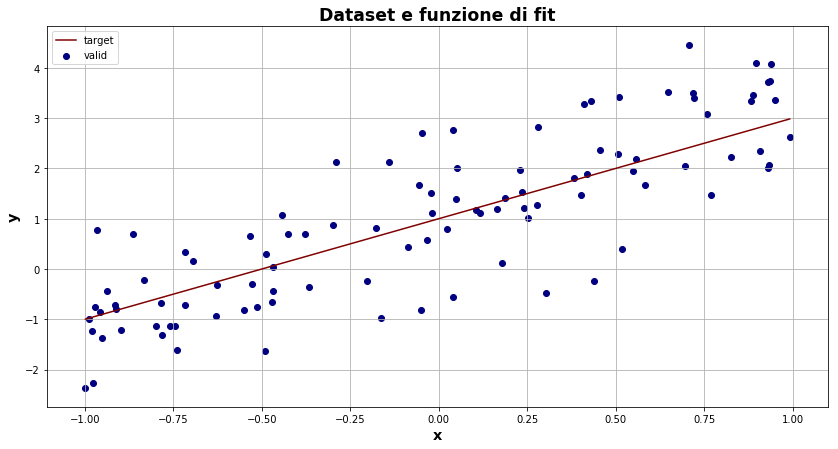

In [2]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort() #ordiniamo il vettore
y_target = m * x_valid + b # ideal (target) linear function

sigma = 1.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot training and target dataset
plt.figure(figsize=(14,7))
plt.title("Dataset e funzione di fit",weight="bold",size="xx-large")
plt.plot(x_valid, y_target,color="maroon",label="target")
plt.scatter(x_valid, y_valid, color='navy',label="valid")
plt.grid(True)
plt.xlabel("x",weight="bold",size="x-large")
plt.ylabel("y",weight="bold",size="x-large")
plt.legend()
plt.show()

Importiamo quindi Keras e alleniamo l'algoritmo. Chiaramente non è possibile mostrare ogni passaggio per tutti i tentativi fatti: mi limiterò quindi a riportare il procedimento per i vari step, commentarlo, e infine commentare i risultati ottenuti nei vari tentativi. 

Un ultimo commento va fatto per commentare l'optimizer, ovvero l'algoritmo che provvede a minimizzare la loss function. In questo caso stiamo usando lo Stocastic Gradient Descent (SGD), che valuta il gradiente della funzione di loss e la muove in quella direzione di un piccolo step.

In [3]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [4]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 1000 samples, validate on 100 samples
Epoch 1/100
1000/1000 [==============================] - 1s 1ms/sample - loss: 4.5719 - mse: 4.5719 - val_loss: 4.2559 - val_mse: 4.2559
Epoch 2/100
1000/1000 [==============================] - 0s 107us/sample - loss: 3.1126 - mse: 3.1126 - val_loss: 3.0376 - val_mse: 3.0376
Epoch 3/100
1000/1000 [==============================] - 0s 116us/sample - loss: 2.2962 - mse: 2.2962 - val_loss: 2.2910 - val_mse: 2.2910
Epoch 4/100
1000/1000 [==============================] - 0s 116us/sample - loss: 1.8057 - mse: 1.8057 - val_loss: 1.8129 - val_mse: 1.8129
Epoch 5/100
1000/1000 [==============================] - 0s 116us/sample - loss: 1.5003 - mse: 1.5003 - val_loss: 1.5011 - val_mse: 1.5011
Epoch 6/100
1000/1000 [==============================] - 0s 132us/sample - loss: 1.3058 - mse: 1.3058 - val_loss: 1.2931 - val_mse: 1.2931
Epoch 7/100
1000/1000 [==============================] - 0s 107us/sample - loss: 1.1811 - mse: 1.1811 - val_loss: 1.1458 

1000/1000 [==============================] - 0s 47us/sample - loss: 0.9483 - mse: 0.9483 - val_loss: 0.8211 - val_mse: 0.8211
Epoch 60/100
1000/1000 [==============================] - 0s 38us/sample - loss: 0.9487 - mse: 0.9487 - val_loss: 0.8211 - val_mse: 0.8211
Epoch 61/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.9480 - mse: 0.9480 - val_loss: 0.8210 - val_mse: 0.8210
Epoch 62/100
1000/1000 [==============================] - 0s 53us/sample - loss: 0.9483 - mse: 0.9483 - val_loss: 0.8214 - val_mse: 0.8214
Epoch 63/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.9485 - mse: 0.9485 - val_loss: 0.8220 - val_mse: 0.8220
Epoch 64/100
1000/1000 [==============================] - 0s 38us/sample - loss: 0.9484 - mse: 0.9484 - val_loss: 0.8212 - val_mse: 0.8212
Epoch 65/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.9485 - mse: 0.9485 - val_loss: 0.8204 - val_mse: 0.8204
Epoch 66/100
1000/1000 [================

I parametri del fit ottenuti sono:

In [5]:
# return weights
optm, optb = model.get_weights()
print("Optimized m = ", optm[0][0])
print("Optimized b = ", optb[0])

Optimized m =  2.0073755
Optimized b =  1.015788


Valutiamo quindi la loss e l'accuracy: in questo caso come loss si è usata la MSE, mean square error, data dalla:
$$MSE=\frac{1}{N}\sum_i^N(y_{true}-y_{NN})^2$$
dove con $y_{true}$ si intende il valore vero e con $y_{NN}$ il valore predetto dalla rete neurale; $N$ è il numero di dati su cui si sta valutando la performance dell'algoritmo.

Valutiamo ora l'andamento della funzione di loss in funzione delle epoche dell'algoritmo:

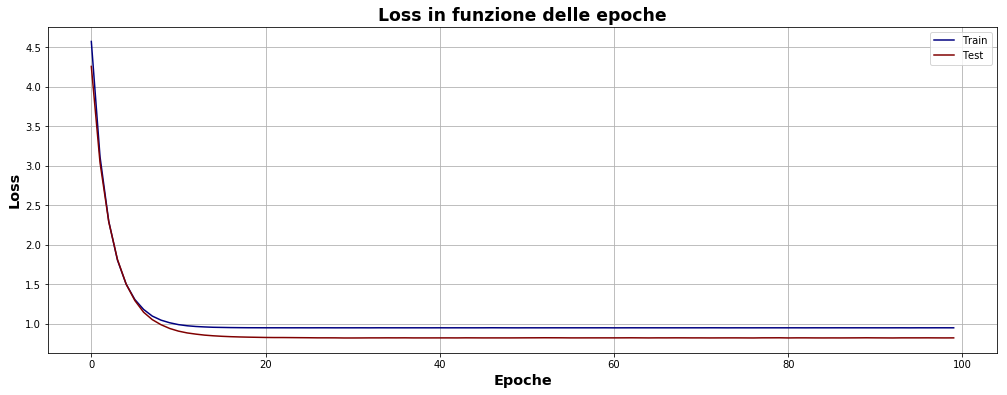

In [6]:
# look into training history
# Plot training & validation loss values
plt.figure(figsize=(17,6))
plt.plot(history.history['loss'],color="navy")
plt.plot(history.history['val_loss'],color="maroon")
plt.title('Loss in funzione delle epoche', weight="bold",size="xx-large")
plt.ylabel('Loss', weight="bold",size="x-large")
plt.xlabel('Epoche', weight="bold",size="x-large")
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

Infine controlliamo che la funzione fitti i punti in maniera adeguata:

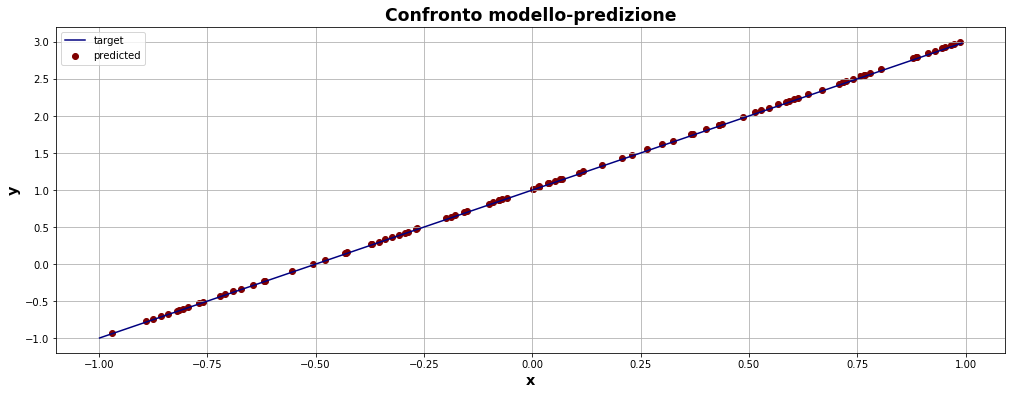

In [7]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.figure(figsize=(17,6))
plt.title("Confronto modello-predizione",weight="bold",size="xx-large")
plt.scatter(x_predicted, y_predicted,color="maroon",label="predicted")
plt.plot(x_valid, y_target, color='navy',label="target")
plt.xlabel("x",weight="bold",size="x-large")
plt.ylabel("y",weight="bold",size="x-large")
plt.legend()
plt.grid(True);
plt.show()

#### Commenti sulla modifica dei parametri
Ci accorgiamo che il numero di epoche deve essere come minimo 100, fissando il numero di dati a 120, per ottenere un buon risultato. Ovviamente anche mantenendo il numero di epoche costante al diminuire dei dati del dataset di train le performance peggiorano sensibilmente.

In particolare ho provato a verificare che per un numero molto piccolo di dati, ad esempio 10, il numero di epoche necessarie a raggiungere risultati paragonabili a quelli di prima aumentava di molto: 500 epoche non erano sufficienti a realizzare  un buon fit.

Al variare della $\sigma$ di noise i risultati peggiorano leggermente: per sigma $\in [0,1]$ il fit raggiunge livelli di accuracy ancora piuttosto alti con i paramentri utilizzati in precedenza di epoche e dati.
Aumentando sensibilmente i dati, anche per sigma più alte si trova un fit corretto.

### Esercizio 11.2

Vogliamo ora estendere il modello a una funzione polinomiale di ordine 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In particolare vogliamo varire:

- il numero di layers
- il numero di neuroni in ogni layer
- l'activation function
- l'optimizer
- e la loss function
  


In questo caso, poichè è possibile salvare le reti neurali allenate tramite l'apposita funzione di Keras, riporterò il confronto tra dati e funzione predetta per tutti i tentativi fatti.

$\textbf{oss}$: per tutti i tentativi teniamo fissi $\sigma=0.2$ e $N_{epoche}=100$

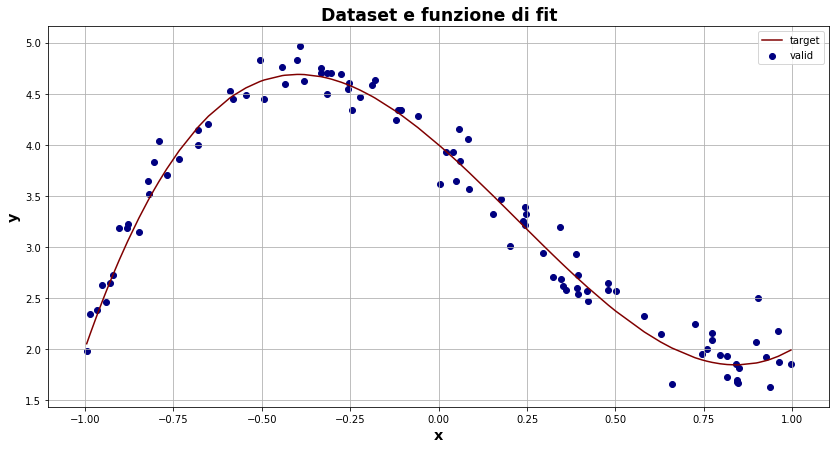

In [8]:
# target parameters of f(x) = 4-3x-2x^2+3x^3
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = 4- 3* x_valid -2*x_valid**2+3*x_valid**3 # ideal (target) linear function

sigma = 0.2 # noise standard deviation,
y_train = np.random.normal(4- 3* x_train -2*x_train**2+3*x_train**3 , sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(4- 3* x_valid -2*x_valid**2+3*x_valid**3 , sigma)

# plot training and target dataset
plt.figure(figsize=(14,7))
plt.title("Dataset e funzione di fit",weight="bold",size="xx-large")
plt.plot(x_valid, y_target,color="maroon",label="target")
plt.scatter(x_valid, y_valid, color='navy',label="valid")
plt.grid(True)
plt.xlabel("x",weight="bold",size="x-large")
plt.ylabel("y",weight="bold",size="x-large")
plt.legend()
plt.show()

#### Numero di Layer e numero di neuroni
La rete neurale è stata trainata utilizzando l'ultimo layer fisso con un neurone e con activation function "tanh"; a partire da questa NN, sono state create le altre aggiungendo un layer alla volta e cambiando in tutti i layer tranne l'ultimo i neuroni per 2,5,10 neuroni, oltre che al caso con tutti i layer con neurone singolo, ottenendo i seguenti risultati:

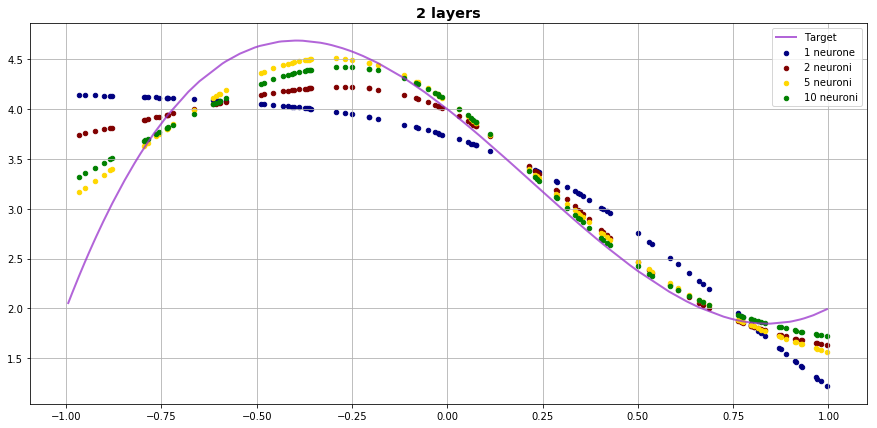

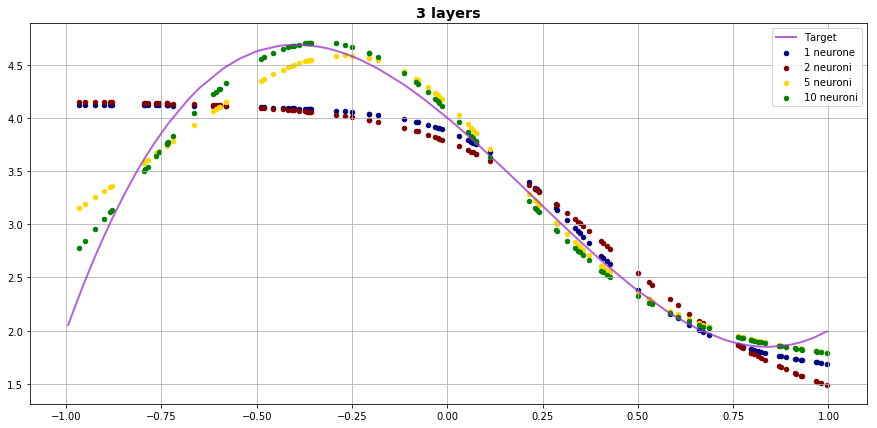

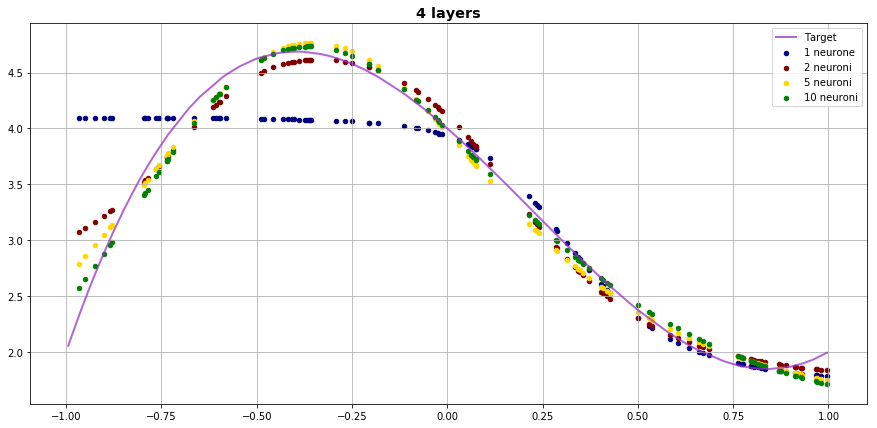

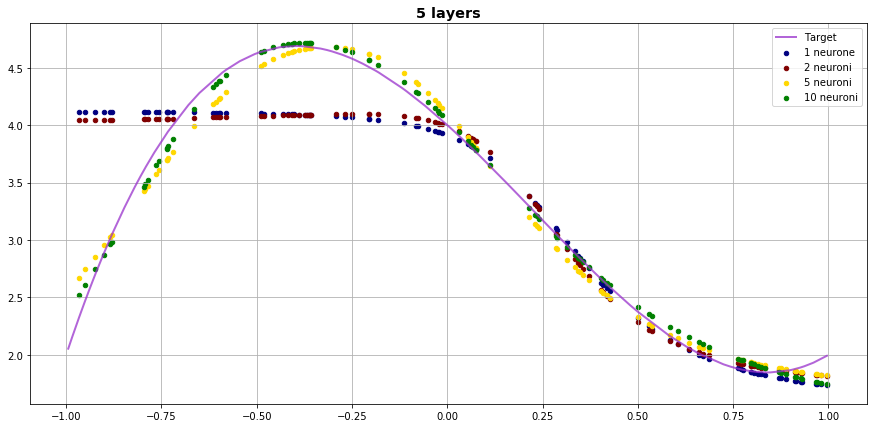

In [9]:
dic5=["(1,1,1,1,1)","(2,2,2,2,1)","(5,5,5,5,1)","(10,10,10,10,1)"]
dic4=["(1,1,1,1)","(2,2,2,1)","(5,5,5,1)","(10,10,10,1)"]
dic3=["(1,1,1)","(2,2,1)","(5,5,1)","(10,10,1)"]
dic2=["(1,1)","(2,1)","(5,1)","(10,1)"]
color=["navy","maroon","gold","green"]
x_predicted = np.random.uniform(-1, 1, 100)
labels=["1 neurone","2 neuroni","5 neuroni","10 neuroni"]
d=[dic2,dic3,dic4,dic5]
k=["2","3","4","5"]
z=0
#plt.figure(figsize=(20,20))
for j in d:
    plt.figure(figsize=(15,7))
    plt.title(k[z]+" layers",weight="bold",size="x-large")
    for i in range(4):
        load="Models12/neurons"+j[i]
        model_old = tf.keras.models.load_model(filepath="Models12/neurons"+j[i])
        x_predicted.sort()
        y_predicted = model_old.predict(x_predicted)
        plt.scatter(x_predicted, y_predicted, s=20, color=color[i], label=labels[i])
        
        
    z=z+1
       
    plt.plot(x_valid, y_target, color='darkorchid', label="Target", linewidth='2', alpha=0.75)
    plt.legend()
    plt.grid(True)
    plt.show()

Si può notare che già con 3 layers di fatto basta aumentare un po' il numero di neuroni per raggiungere buoni risultati. Aumentare ulteriormente i layers non sembra condurre a miglioramenti.

#### Funzione di attivazione
Proviamo ora a modificare la funzione di attivazione, tenendo fissa la configurazione a 5 layer e 10 neuroni e la configurazione a 3 layers e 10 neuroni.

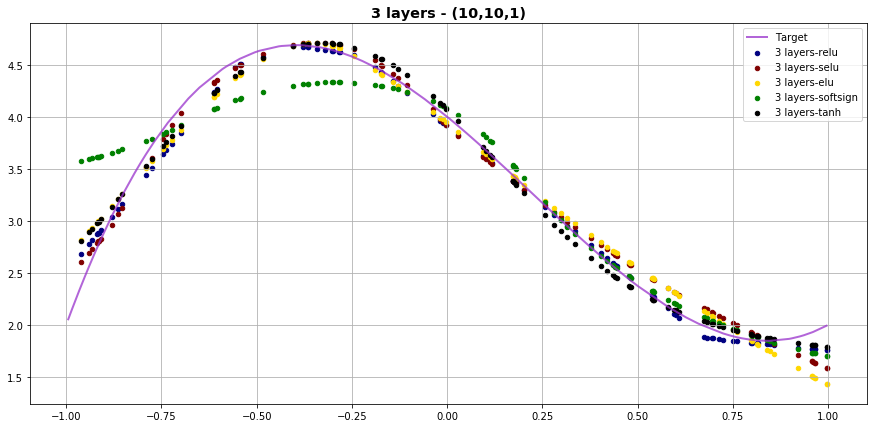

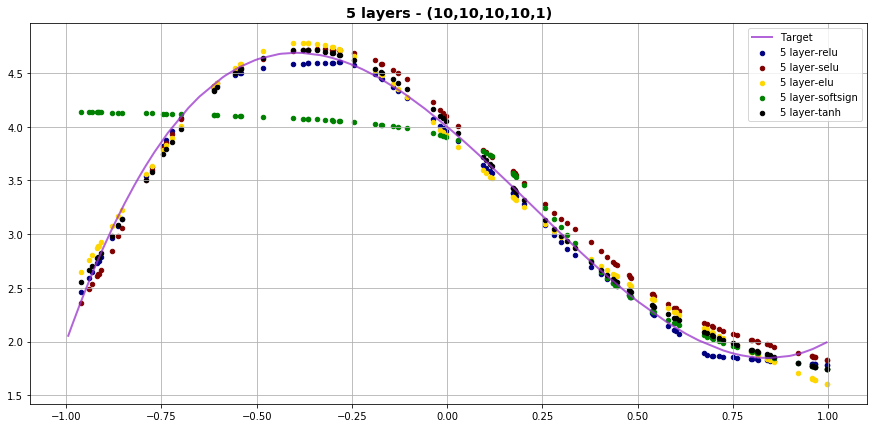

In [10]:
dicl=["(10,10,1)","(10,10,10,10,1)"]
dica=["relu","selu","elu","softsign","neurons"]

color=["navy","maroon","gold","green","black"]
x_predicted = np.random.uniform(-1, 1, 100)
labels=["3 layers","5 layer"]
d=[dic2,dic3,dic4,dic5]
k=["3","5"]
z=0
#plt.figure(figsize=(20,20))
for j in range(2):
    plt.figure(figsize=(15,7))
    plt.title(k[z]+" layers - "+dicl[j],weight="bold",size="x-large")
    for i in range(5):
        load="Models12/"+dica[i]+dicl[j]
        model_old = tf.keras.models.load_model(filepath=load)
        x_predicted.sort()
        y_predicted = model_old.predict(x_predicted)
        if(dica[i]=="neurons"): plt.scatter(x_predicted, y_predicted, s=20, color=color[i], label=labels[j]+"-tanh")
        else: plt.scatter(x_predicted, y_predicted, s=20, color=color[i], label=labels[j]+"-"+dica[i])
        
        
    z=z+1
       
    plt.plot(x_valid, y_target, color='darkorchid', label="Target", linewidth='2', alpha=0.75)
    plt.legend()
    plt.grid(True)
    plt.show()

Per queste configurazioni sembra che la funzione di attivazione sia abbastanza equivalente per questo problema, eccettuato il caso della "softsign", che ottiene risultati peggiori.

### Optimizer
Passiamo ora, tenendo fissa la funzione di attivazione "tanh" a verificare cosa succede modificando l'optimizer.

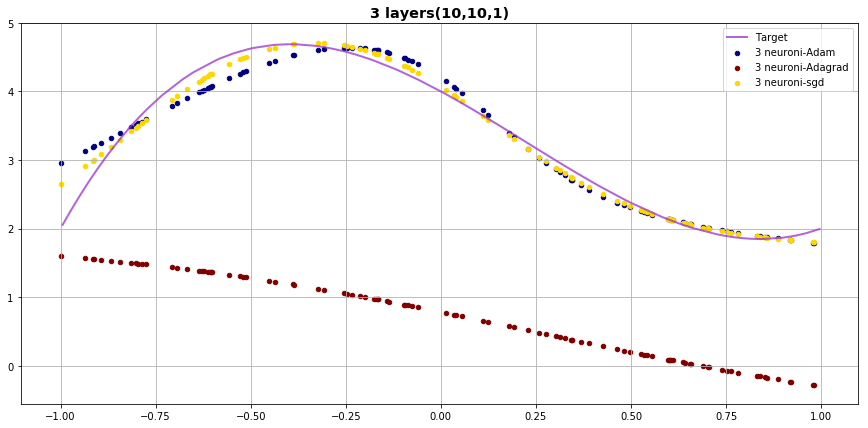

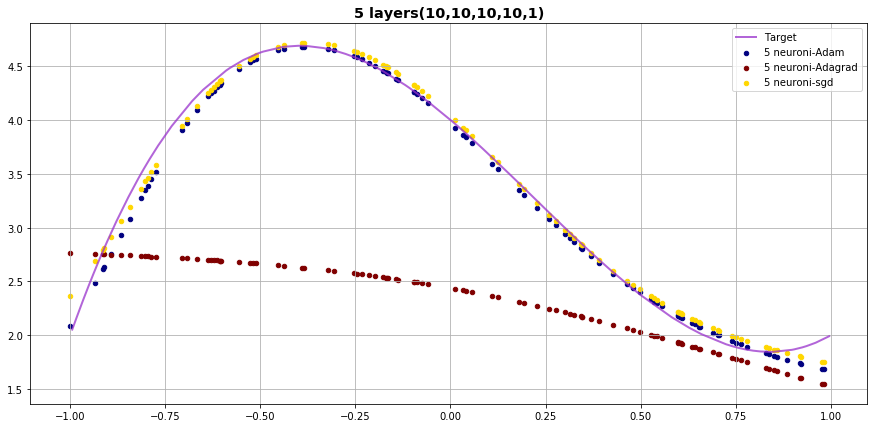

In [11]:
dicl=["(10,10,1)","(10,10,10,10,1)"]
dica=["Adam","Adagrad","neurons"]

color=["navy","maroon","gold","green","black"]
x_predicted = np.random.uniform(-1, 1, 100)
labels=["3 neuroni","5 neuroni"]
d=[dic2,dic3,dic4,dic5]
k=["3","5"]
z=0
#plt.figure(figsize=(20,20))
for j in range(2):
    plt.figure(figsize=(15,7))
    plt.title(k[z]+" layers"+dicl[j],weight="bold",size="x-large")
    for i in range(3):
        load="Models12/"+dica[i]+dicl[j]
        model_old = tf.keras.models.load_model(filepath=load)
        x_predicted.sort()
        y_predicted = model_old.predict(x_predicted)
        if(dica[i]=="neurons"): plt.scatter(x_predicted, y_predicted, s=20, color=color[i], label=labels[j]+"-sgd")
        else: plt.scatter(x_predicted, y_predicted, s=20, color=color[i], label=labels[j]+"-"+dica[i])
        
        
    z=z+1
       
    plt.plot(x_valid, y_target, color='darkorchid', label="Target", linewidth='2', alpha=0.75)
    plt.legend()
    plt.grid(True)
    plt.show()

SGD e adam da questi tentativi sembrano essere i migliori optimizer per questo problema.

#### Loss function
Teniamo fisso "SGD" e le configurazioni precedenti e proviamo a cambiare la loss function:

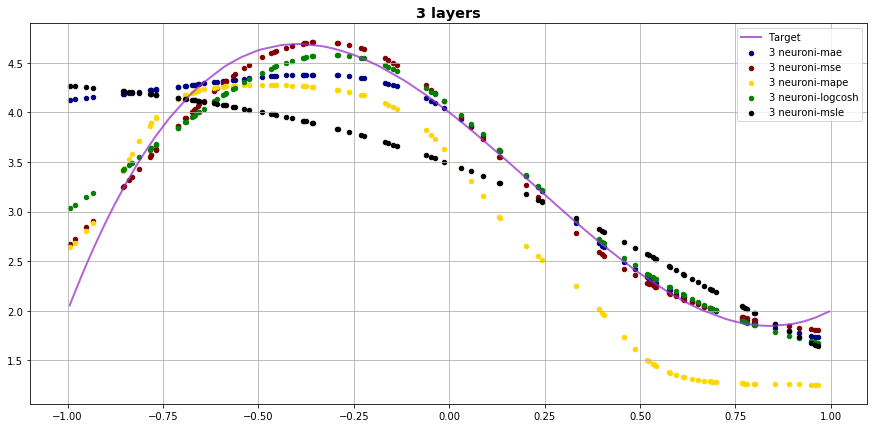

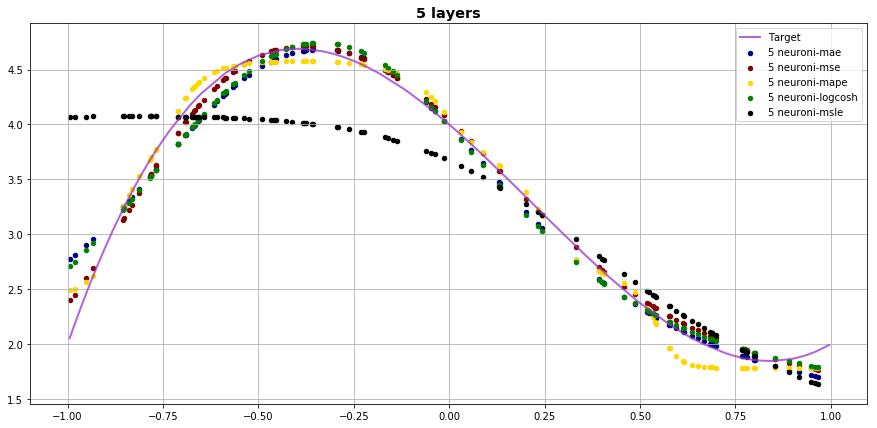

In [12]:
dicl=["(10,10,1)","(10,10,10,10,1)"]
dica=["mae","neurons","mape","logcosh","msle"]

color=["navy","maroon","gold","green","black"]
x_predicted = np.random.uniform(-1, 1, 100)
labels=["3 neuroni","5 neuroni"]
d=[dic2,dic3,dic4,dic5]
k=["3","5"]
z=0
#plt.figure(figsize=(20,20))
for j in range(2):
    plt.figure(figsize=(15,7))
    plt.title(k[z]+" layers",weight="bold",size="x-large")
    for i in range(5):
        load="Models12/"+dica[i]+dicl[j]
        model_old = tf.keras.models.load_model(filepath=load)
        x_predicted.sort()
        y_predicted = model_old.predict(x_predicted)
        if(dica[i]=="neurons"): plt.scatter(x_predicted, y_predicted, s=20, color=color[i], label=labels[j]+"-mse")
        else: plt.scatter(x_predicted, y_predicted, s=20, color=color[i], label=labels[j]+"-"+dica[i])
        
        
    z=z+1
       
    plt.plot(x_valid, y_target, color='darkorchid', label="Target", linewidth='2', alpha=0.75)
    plt.legend()
    plt.grid(True)
    plt.show()

Si osserva cge "logcosh" e "mse" sembrano essere le loss migliori per il problema.

Un'importante precisazione ai tentativi fatti: non vi è alcuna evidenza che le configurazioni scelte implichino che la migliore opzione sia quella che ha fatto registrare il miglior risultato nei tentativi effettuati. Infatti potrebbe benissimo essere che, usando altri parametri, il confronto per una di queste categorie, ad esempio le log loss, porti a privilegiare un'altra log loss rispetto a quella che abbiamo usato nelle configurazioni scelte. In altre parole un'analisi completa presupporrebbe di toccare  tutte le combinazioni della griglia di opzioni, non tenerne fisse alcune e modificare le altre.

Alla luce di tutto ciò, tenendo fissi sgd e mse, ripetiamo ciò che abbiamo fatto nel confronto modificando i neuroni  e i layers per vedere come cambia la loss in funzione del numero dei parametri del modello, e verificare se le predizioni sono buone anche nel range dove il modello non è stato allenato.

il modello ha : 4  parametri
e raggiunge le seguente accuracy:  0.4192387449741364
il modello ha : 7  parametri
e raggiunge le seguente accuracy:  0.22196948170661926
il modello ha : 16  parametri
e raggiunge le seguente accuracy:  0.09279526472091675
il modello ha : 31  parametri
e raggiunge le seguente accuracy:  0.11523493781685828


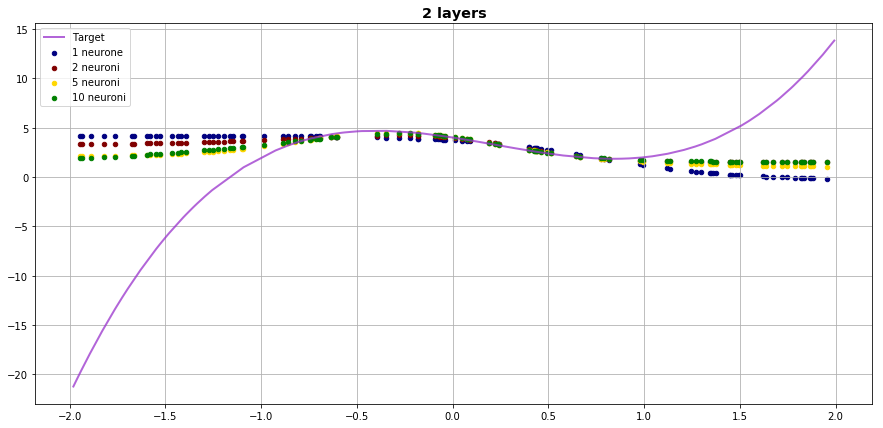

il modello ha : 6  parametri
e raggiunge le seguente accuracy:  0.3476829814910889
il modello ha : 13  parametri
e raggiunge le seguente accuracy:  0.3801175785064697
il modello ha : 46  parametri
e raggiunge le seguente accuracy:  0.08295410320162773
il modello ha : 141  parametri
e raggiunge le seguente accuracy:  0.04727856531739235


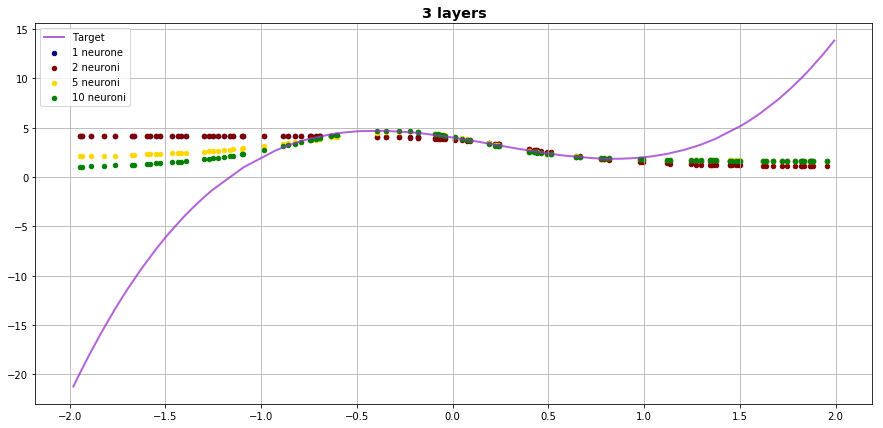

il modello ha : 8  parametri
e raggiunge le seguente accuracy:  0.33484133824706075
il modello ha : 19  parametri
e raggiunge le seguente accuracy:  0.06899446099996567
il modello ha : 76  parametri
e raggiunge le seguente accuracy:  0.048739403784275055
il modello ha : 251  parametri
e raggiunge le seguente accuracy:  0.042762623727321626


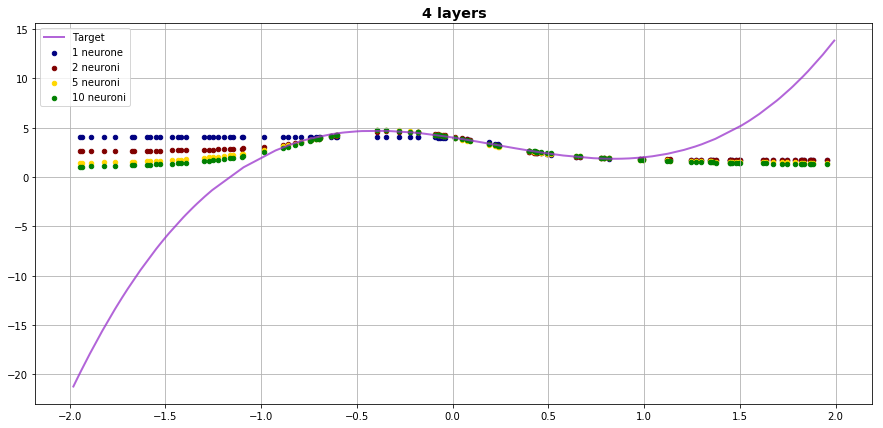

il modello ha : 10  parametri
e raggiunge le seguente accuracy:  0.3406059308350086
il modello ha : 25  parametri
e raggiunge le seguente accuracy:  0.31347896590828894
il modello ha : 106  parametri
e raggiunge le seguente accuracy:  0.047562988251447676
il modello ha : 361  parametri
e raggiunge le seguente accuracy:  0.03812164932489395


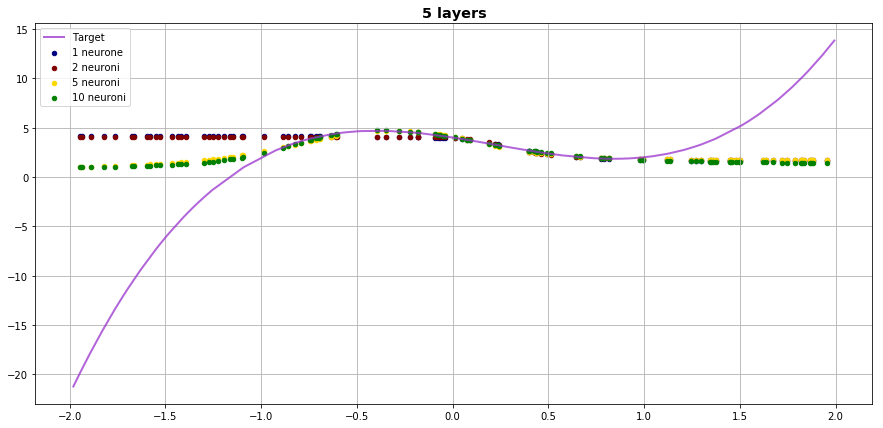

In [13]:
x_predicted = np.random.uniform(-2, 2, 100)
x_outrange = np.random.uniform(-2, 2, 100)
x_outrange.sort()
y_outrange = 4- 3* x_outrange -2*x_outrange**2+3*x_outrange**3

dic5=["(1,1,1,1,1)","(2,2,2,2,1)","(5,5,5,5,1)","(10,10,10,10,1)"]
dic4=["(1,1,1,1)","(2,2,2,1)","(5,5,5,1)","(10,10,10,1)"]
dic3=["(1,1,1)","(2,2,1)","(5,5,1)","(10,10,1)"]
dic2=["(1,1)","(2,1)","(5,1)","(10,1)"]
color=["navy","maroon","gold","green"]
labels=["1 neurone","2 neuroni","5 neuroni","10 neuroni"]
d=[dic2,dic3,dic4,dic5]
k=["2","3","4","5"]
z=0
#plt.figure(figsize=(20,20))
for j in d:
    plt.figure(figsize=(15,7))
    plt.title(k[z]+" layers",weight="bold",size="x-large")
    for i in range(4):
        load="Models12/neurons"+j[i]
        model_old = tf.keras.models.load_model(filepath="Models12/neurons"+j[i])
        x_predicted.sort()
        y_predicted = model_old.predict(x_predicted)
        plt.scatter(x_predicted, y_predicted, s=20, color=color[i], label=labels[i])
        print("il modello ha :",model_old.count_params()," parametri")
        #score.append(model.evaluate(x_valid, y_valid, batch_size=32, verbose=0))
        print("e raggiunge le seguente accuracy: ", model_old.evaluate(x_valid, y_valid, batch_size=32, verbose=0)[0])
        
    z=z+1
       
    plt.plot(x_outrange, y_outrange, color='darkorchid', label="Target", linewidth='2', alpha=0.75)
    plt.legend()
    plt.grid(True)
    plt.show()

La rete non riesce a fittare bene i punti che cadono fuori dal range in cui è stata allenata, indipendentemente dal modello e dalla sua complessità. Possiamo notare che le performance della rete neurale sembrano aumentare con la complessità del modello. In ogni caso si può immaginare che un'eccessivo numero di parametri nel modello porti a una complessità della rete non necessaria per il compito che deve svolgere, pertanto occorre ottimizzare la complessità del modello per ottenere un risultato accurato ma anche efficiente.

### Exercise 11.3
  
Proviamo ora a estendere l'uso della rete neurale alla funzione:
$$f(x,y) = \sin(x^2+y^2)$$ 

nel range $x \in [-3/2,3/2]$ e $y \in [-3/2,3/2]$.

In [16]:
#abbassiamo leggermente sigma
sigma=0.1
##creiamo la funzione
def f(x, y):
    return np.sin(x**2+y**2)

# dataset
dat_train=np.zeros((30000,2))
dat_train[:,0]=np.random.uniform(-1.5, 1.5, 30000) 
dat_train[:,1]=np.random.uniform(-1.5, 1.5, 30000)

dat_valid=np.zeros((2000,2))
dat_valid[:,0]=np.random.uniform(-1.5, 1.5, 2000) 
dat_valid[:,1]=np.random.uniform(-1.5, 1.5, 2000)

fz_target=f(dat_valid[:,0],dat_valid[:,1]) 

# dataset + sigma
fz_train= np.random.normal(f(dat_train[:,0], dat_train[:,1]), sigma) 
fz_valid= np.random.normal(f(dat_valid[:,0], dat_valid[:,1]), sigma)

Utilizziamo ora il modello che era risultato più funzionante precedentemente con:
- layers e neuroni: 5 layers 10 neuroni
- activation: "tanh"
- loss: "mse"
- optimizer: "sgd"

e applichiamolo a questa funzione.

Oltre a questo, riapplichiamo lo stesso modello con "adam" come optimizer per fare un confronto.:

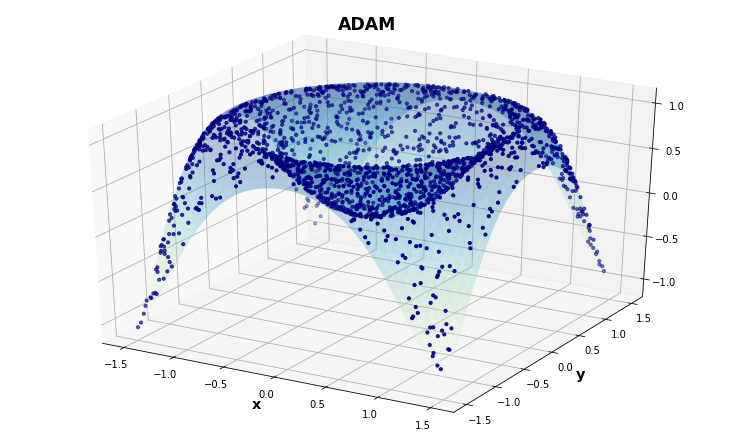

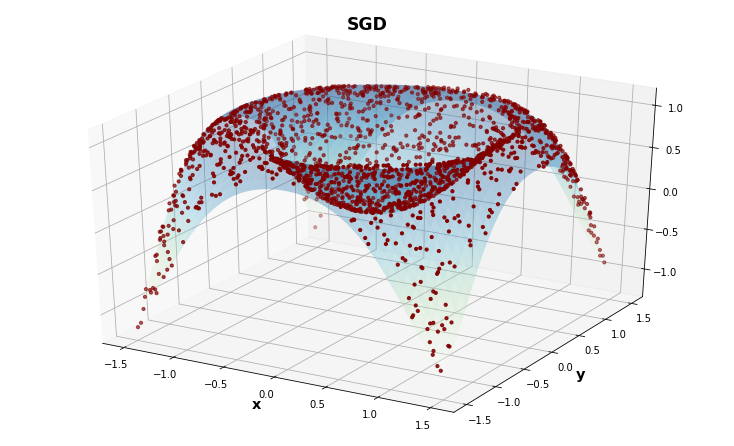

In [19]:
###################################################### ADAM
opt1='Adam'
opt2='sgd'


model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(2,), activation="tanh"))
model.add(Dense(10, activation="tanh"))
model.add(Dense(10, activation="tanh"))
model.add(Dense(10, activation="tanh"))
model.add(Dense(1,activation="linear"))
model.compile(optimizer=opt1, loss="mse", metrics=['mse'])
history= model.fit(dat_train, fz_train, batch_size=32, epochs=100, validation_data=(dat_valid, fz_valid), verbose=0) #callbacks=[ plot_estimate, earlystop],

#predicted value
dat_predicted=np.zeros((2000,2))
dat_predicted[:,0]=np.random.uniform(-1.5, 1.5, 2000) 
dat_predicted[:,1]=np.random.uniform(-1.5, 1.5, 2000)
fz_predicted = model.predict(dat_predicted)

##griglia 3D
X = np.copy(dat_valid[:,0])
Y = np.copy(dat_valid[:,1])
X.sort()
Y.sort()
X, Y = np.meshgrid(X,Y)
f_xy=f(X,Y)



fig = plt.figure(figsize=(10,6))
plt.suptitle("ADAM",weight="bold",size="xx-large")
ax = Axes3D(fig)
ax.plot_surface(X, Y, f_xy, cmap='GnBu', alpha=0.3)
ax.scatter(dat_predicted[:,0], dat_predicted[:,1], fz_predicted, c='navy', marker='.', s=40, label='Predizione') #c = np.abs(z_valid), cmap='gnuplot',
ax.set_xlabel('x',weight="bold",size="x-large")
ax.set_ylabel('y',weight="bold",size="x-large")

#####################################################SGD
model2 = tf.keras.Sequential()
model2.add(Dense(10, input_shape=(2,), activation="tanh"))
model2.add(Dense(10, activation="tanh"))
model2.add(Dense(10, activation="tanh"))
model2.add(Dense(10, activation="tanh"))
model2.add(Dense(1,activation="linear"))
model2.compile(optimizer=opt2, loss="mse", metrics=['mse'])
history= model2.fit(dat_train, fz_train, batch_size=32, epochs=100, validation_data=(dat_valid, fz_valid), verbose=0) #callbacks=[ plot_estimate, earlystop],
score = model2.evaluate(dat_valid, fz_valid, batch_size=32, verbose=0)

fz_predicted = model2.predict(dat_predicted)

fig2 = plt.figure(figsize=(10,6))
plt.suptitle("SGD",weight="bold",size="xx-large")
fig = Axes3D(fig2)
fig.plot_surface(X, Y, f_xy, cmap='GnBu', color="red", alpha=0.3)
fig.scatter(dat_predicted[:,0], dat_predicted[:,1], fz_predicted, c='maroon', marker='.', s=40, label='Predizione') #c = np.abs(z_valid), cmap='gnuplot',
fig.set_xlabel('x',weight="bold",size="x-large")
fig.set_ylabel('y',weight="bold",size="x-large")
plt.show()

Entrambi i modelli sembrano raggiungere buoni risultati.